In [10]:
import matplotlib.pyplot as plt
import re
import numpy as np

# Scaling

In [11]:
def scale(val, src, dst):
        """
        Scale the given value from the scale of src to the scale of dst.
        """
        return ((val - src[0]) / (src[1]-src[0])) * (dst[1]-dst[0]) + dst[0]
def f11(data):
    l1=[]
    for x in data:
        if x < s1:
            l1.append(x)
        elif x<s2:
            l1.append(scale(x, source_scale_1, destination_scale_1) )
        elif x<s3: 
            l1.append(scale(x, source_scale_2, destination_scale_2))
        elif x<s4: 
            l1.append(scale(x, source_scale_3, destination_scale_3))
        else:
            l1.append(scale(x, source_scale_4, destination_scale_4))
    return l1

# Loading Dataset

In [12]:
et={}
ct={}
tt={}

In [13]:
def pri(s):
    ct[s]={}
    et[s]={}
    tt[s]={}
    
def pri2(s,w):
    ct[s][w]=[]
    et[s][w]=[]
    tt[s][w]=[]

    
def pri3(s,w,f,c):
    if(c==1):
        et[s][w].append(f[0])
    elif(c==2):
        ct[s][w].append(f[0])
    elif(c==3):
        tt[s][w].append(f[0])

In [14]:
s=''
dt=['ER1k.gxl','ER5k.gxl','ER10k.gxl','ER25k.gxl']
def readfile1(str1):
    f = open(str1, "r")
    w=0
    counter=0
    counter2=0
    for l in f.readlines():
        counter=counter+1

        if(".gxl" in l):
            for d in dt:
                if (d in l):
                    s=d
                    pri(s)
                    
            w=10
            pri2(s,w)
            counter=0
            continue
        elif("W=10F" in l):

            pri3(s,w,re.findall("\d+\.\d+", l),counter)
            w=30
            pri2(s,w)
            counter=0
            continue

        elif("W=30F" in l):

            pri3(s,w,re.findall("\d+\.\d+", l),counter)
            w=50
            pri2(s,w)
            counter=0
            continue
        elif("W=50F" in l):

            pri3(s,w,re.findall("\d+\.\d+", l),counter)
            w=80
            pri2(s,w)
            counter=0
            continue
        elif("W=80F" in l):

            pri3(s,w,re.findall("\d+\.\d+", l),counter)
            w=150
            pri2(s,w)
            counter=0
            continue
        elif("W=150F" in l):

            pri3(s,w,re.findall("\d+\.\d+", l),counter)
            counter=0
            continue
        elif(w==0):
            counter=0
            continue
        
        if(s!=0 and w!=0):
            pri3(s,w,re.findall("\d+\.\d+", l),counter)



In [15]:
readfile1("./res.txt")

# Total Time of MSDGSD

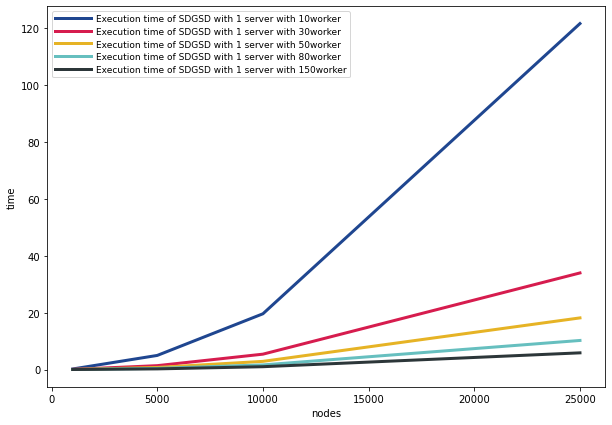

In [16]:
workers=[10,30,50,80,150]
nodes = [1000,5000,10000,25000]
dt=['ER1k.gxl','ER5k.gxl','ER10k.gxl','ER25k.gxl']

#plt.plot(nodes, tt[2][10],color='red',linestyle='-.', marker='o',linewidth=2,label=w)
plt.figure(figsize=(10,7))
dic1={}


#wc
for s in dt:
    t_v=et[s]
    for w in workers:
        dic1[w]=dic1.get(w,[])
        dic1[w].append(float(t_v[w][0]))
    
    
Colors={10:"#1F4690",30:"#D61C4E",50:"#E6B325",80:"#66BFBF",150:"#2C3639"}
for s in workers:
    x='-'    
    plt.plot(nodes, (dic1[s]),linestyle=x,linewidth=3,color=Colors[s],label='Execution time of SDGSD with 1 server with '+str(s)+'worker')


    
    


leg = plt.legend(loc='upper left',handlelength=4,labelspacing=0.4,fontsize=9,frameon = True,handletextpad=0.5,)

plt.title('')
plt.xlabel('nodes')
plt.ylabel('time')
plt.savefig('N1.jpg',bbox_inches='tight', dpi=150)
plt.show()


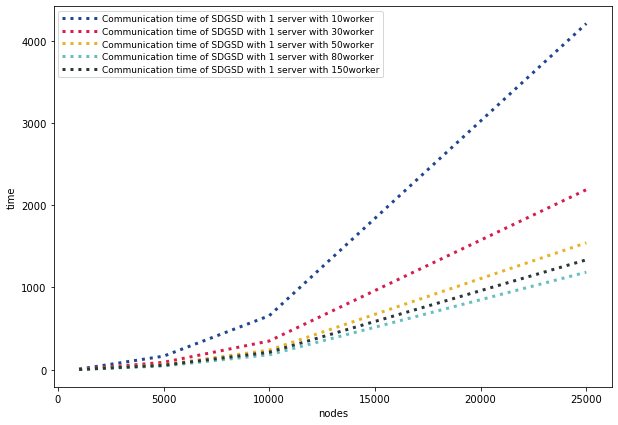

In [18]:
workers=[10,30,50,80,150]
nodes = [1000,5000,10000,25000]
dt=['ER1k.gxl','ER5k.gxl','ER10k.gxl','ER25k.gxl']

#plt.plot(nodes, tt[2][10],color='red',linestyle='-.', marker='o',linewidth=2,label=w)
plt.figure(figsize=(10,7))
dic1={}


#wc
for s in dt:
    t_v=tt[s]
    for w in workers:
        dic1[w]=dic1.get(w,[])
        dic1[w].append(float(t_v[w][0]))
    
    
Colors={10:"#1F4690",30:"#D61C4E",50:"#E6B325",80:"#66BFBF",150:"#2C3639"}
for s in workers:
    x='dotted'    
    plt.plot(nodes, (dic1[s]),linestyle=x,linewidth=3,color=Colors[s],label='Communication time of SDGSD with 1 server with '+str(s)+'worker')


    
    


leg = plt.legend(loc='upper left',handlelength=4,labelspacing=0.4,fontsize=9,frameon = True,handletextpad=0.5,)

plt.title('')
plt.xlabel('nodes')
plt.ylabel('time')
plt.savefig('N1.jpg',bbox_inches='tight', dpi=150)
plt.show()


# Communcation and execution time of each worker

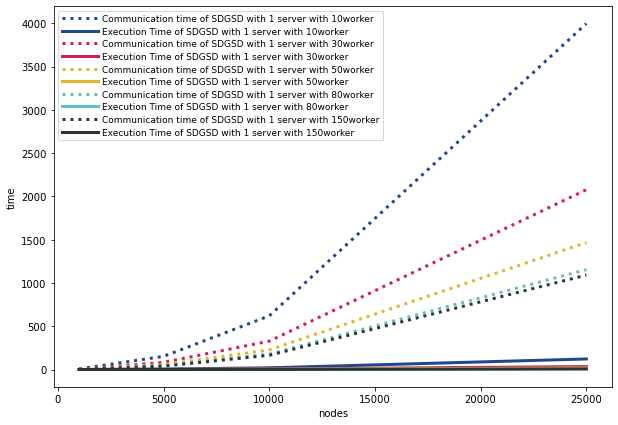

In [19]:
workers=[10,30,50,80,150]
nodes = [1000,5000,10000,25000]
dt=['ER1k.gxl','ER5k.gxl','ER10k.gxl','ER25k.gxl']

#plt.plot(nodes, tt[2][10],color='red',linestyle='-.', marker='o',linewidth=2,label=w)
plt.figure(figsize=(10,7))
dic1={}

    

for s in dt:
    t_v=ct[s]
    for w in workers:
        dic1[w]=dic1.get(w,[])
        dic1[w].append(float(t_v[w][0]))
dic2={}

#wc
for s in dt:
    t_v=et[s]
    for w in workers:
        dic2[w]=dic2.get(w,[])
        dic2[w].append(float(t_v[w][0]))
        
Colors={10:"#1F4690",30:"#D61C4E",50:"#E6B325",80:"#66BFBF",150:"#2C3639"}
for s in workers:
    x='dotted'    
    plt.plot(nodes, (dic1[s]),linestyle=x,linewidth=3,color=Colors[s],label='Communication time of SDGSD with 1 server with '+str(s)+'worker')
    x=None
    plt.plot(nodes, (dic2[s]),linestyle=x,linewidth=3,color=Colors[s],label='Execution Time of SDGSD with 1 server with '+str(s)+'worker')

    
    


leg = plt.legend(loc='upper left',handlelength=4,labelspacing=0.4,fontsize=9,frameon = True,handletextpad=0.5,)

plt.title('')
plt.xlabel('nodes')
plt.ylabel('time')
plt.savefig('N2.jpg',bbox_inches='tight', dpi=150)
plt.show()


# Total time taken by incraesing worker

In [22]:
workers=[10,30,50,80,150]
nodes = [1000,5000,10000,25000]

s1=0
s2=200
s3=700
s4=1500
s5=4500

d1=0
d2=20
d3=30
d4=45
d5=60

source_scale_1 = (s1, s2) # Scale values between 100 and 600
destination_scale_1 = (d1, d2) # to a scale between 100 and 150
source_scale_2 = (s2, s3) # Scale values between 100 and 600
destination_scale_2 = (d2, d3) # to a scale between 100 and 150
source_scale_3 = (s3, s4) # Scale values between 100 and 600
destination_scale_3 = (d3, d4) # to a scale between 100 and 150
source_scale_4 = (s4, s5) # Scale values between 100 and 600
destination_scale_4 = (d4, d5) # to a scale between 100 and 150

def scale(val, src, dst):
        """
        Scale the given value from the scale of src to the scale of dst.
        """
        return ((val - src[0]) / (src[1]-src[0])) * (dst[1]-dst[0]) + dst[0]
def f11(data):
    l1=[]
    for x in data:
        if x < s1:
            l1.append(x)
        elif x<s2:
            l1.append(scale(x, source_scale_1, destination_scale_1) )
        elif x<s3: 
            l1.append(scale(x, source_scale_2, destination_scale_2))
        elif x<s4: 
            l1.append(scale(x, source_scale_3, destination_scale_3))
        else:
            l1.append(scale(x, source_scale_4, destination_scale_4))
    return l1

<Figure size 504x360 with 0 Axes>

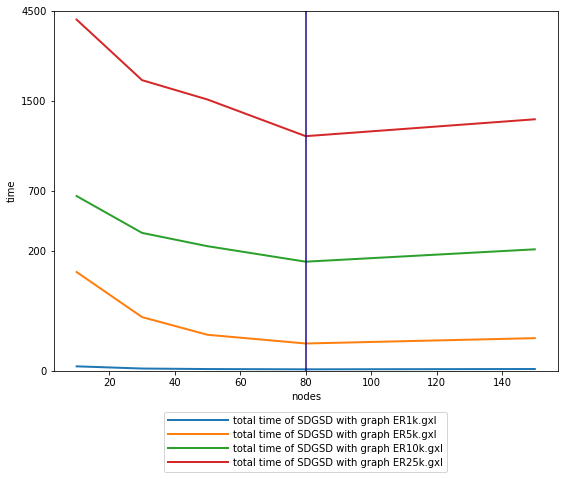

In [24]:
workers=[10,30,50,80,150]
nodes = [1000,5000,10000,25000]
dt=['ER1k.gxl','ER5k.gxl','ER10k.gxl','ER25k.gxl']

plt.figure(figsize=(7,5))
dic1={}

# Set up a simple plot
fig = plt.figure(figsize=(7,5))
ax = plt.Axes(fig, [0.,0.,1.,1.])
fig.add_axes(ax)

# Set the y-ticks to a custom scale
ax.set_yticks([d1,d2,d3,d4,d5])
ax.set_ylim(0, d5)
# Set the labels to the actual values
ax.set_yticklabels([s1,s2,s3,s4,s5])   



dic={}
for x in dt:
    dic[x]=[]
    for y in workers:
        dic[x].append( ([float(x) for x in tt[x][y] ][0]) )
       

for s in dt:
    x=None   

    plt.plot(workers, f11(dic[s]),linestyle=x,linewidth=2,label='total time of SDGSD with graph '+str(s))

    
    
plt.axvline(x=80, c='#1F0690')
leg = plt.legend(loc='upper center',handlelength=6,bbox_to_anchor=(0.5,-0.1),labelspacing=0.4,fontsize=10,frameon = True,handletextpad=0.5,)
plt.title('')

plt.xlabel('nodes')
plt.ylabel('time')
plt.savefig('N3.jpg',bbox_inches='tight', dpi=150)
plt.show()